In [1]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'archive/images/train'
TEST_DIR = 'archive/images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                        image     label
0            archive/images/train\angry\0.jpg     angry
1            archive/images/train\angry\1.jpg     angry
2           archive/images/train\angry\10.jpg     angry
3        archive/images/train\angry\10002.jpg     angry
4        archive/images/train\angry\10016.jpg     angry
...                                       ...       ...
28816  archive/images/train\surprise\9969.jpg  surprise
28817  archive/images/train\surprise\9985.jpg  surprise
28818  archive/images/train\surprise\9990.jpg  surprise
28819  archive/images/train\surprise\9992.jpg  surprise
28820  archive/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)

                                      image     label
0       archive/images/test\angry\10052.jpg     angry
1       archive/images/test\angry\10065.jpg     angry
2       archive/images/test\angry\10079.jpg     angry
3       archive/images/test\angry\10095.jpg     angry
4       archive/images/test\angry\10121.jpg     angry
...                                     ...       ...
7061  archive/images/test\surprise\9806.jpg  surprise
7062  archive/images/test\surprise\9830.jpg  surprise
7063  archive/images/test\surprise\9853.jpg  surprise
7064  archive/images/test\surprise\9878.jpg  surprise
7065   archive/images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [11]:

test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )


In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 17, validation_data = (x_test,y_test)) 


Epoch 1/17


226/226 [==============================] - 383s 2s/step - loss: 1.8235 - accuracy: 0.2432 - val_loss: 1.8078 - val_accuracy: 0.2583
Epoch 2/17
226/226 [==============================] - 385s 2s/step - loss: 1.7993 - accuracy: 0.2495 - val_loss: 1.7438 - val_accuracy: 0.2881
Epoch 3/17
226/226 [==============================] - 452s 2s/step - loss: 1.7072 - accuracy: 0.3006 - val_loss: 1.5976 - val_accuracy: 0.3631
Epoch 4/17
226/226 [==============================] - 396s 2s/step - loss: 1.5804 - accuracy: 0.3771 - val_loss: 1.4383 - val_accuracy: 0.4383
Epoch 5/17
226/226 [==============================] - 403s 2s/step - loss: 1.4864 - accuracy: 0.4219 - val_loss: 1.3705 - val_accuracy: 0.4717
Epoch 6/17
226/226 [==============================] - 464s 2s/step - loss: 1.4242 - accuracy: 0.4479 - val_loss: 1.2969 - val_accuracy: 0.4950
Epoch 7/17
226/226 [==============================] - 469s 2s/step - loss: 1.3816 - accuracy: 0.4680 - val_loss: 1.2542 - val_accuracy: 0.52

In [21]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [22]:
from keras.models import model_from_json


In [23]:

json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [25]:

def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [32]:
image = 'archive/images/test/happy/10638.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 51ms/step
model prediction is  neutral


In [38]:
image = 'archive/images/test/happy/28807.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 [==============================] - 0s 58ms/step
model prediction is  happy


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - ETA: 0s

C:\Users\abhis\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
model prediction is  happy


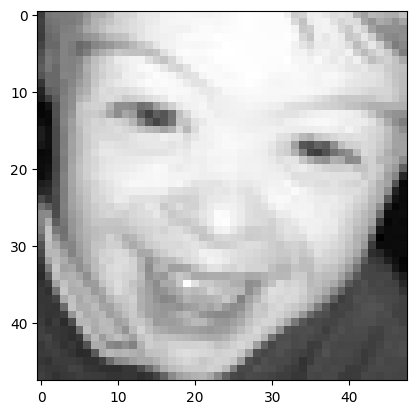

In [40]:
image = 'archive/images/test/happy/28807.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 [==============================] - 0s 47ms/step
model prediction is  disgust


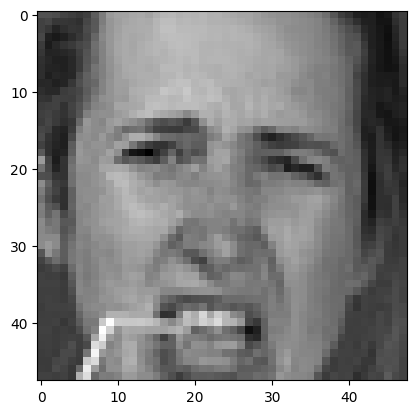

In [42]:
image = 'archive/images/test/disgust/8585.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')